In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [12]:
# Load dataset
df = pd.read_csv("iris.csv")

In [14]:
# Rename columns properly
df.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]

In [15]:
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  Setosa
1          4.9         3.0          1.4         0.2  Setosa
2          4.7         3.2          1.3         0.2  Setosa
3          4.6         3.1          1.5         0.2  Setosa
4          5.0         3.6          1.4         0.2  Setosa

In [17]:
# Check data information
print(df.info())
print("\nSummary statistics:\n")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary statistics:

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.057333     3.758000    1.199333
std       0.828066    0.435866     1.765298    0.762238
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [18]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

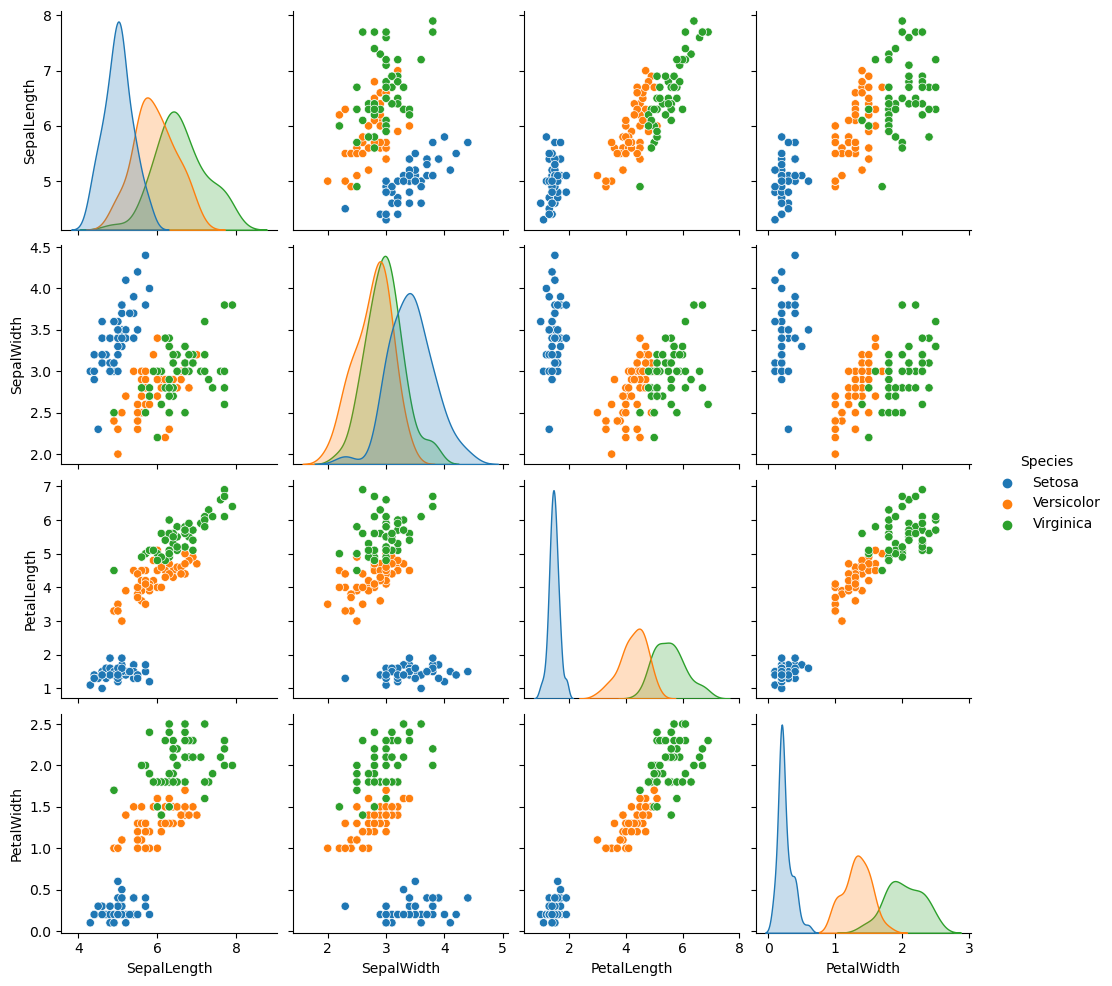

In [19]:
# Visualize dataset using pairplot
sns.pairplot(df, hue="Species")
plt.show()


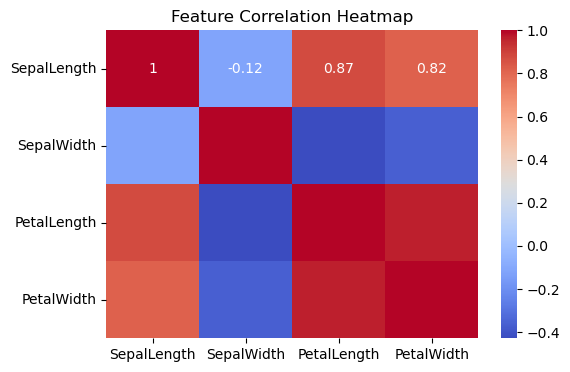

In [20]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
# Split dataset into features and target
X = df[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
y = df["Species"]

# Split data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Train SVM model (Linear Kernel)
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Evaluate
print("Linear Kernel SVM Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))


Linear Kernel SVM Results:

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.89      0.94         9
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [24]:
# Train SVM model (RBF Kernel)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate
print("RBF Kernel SVM Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))


RBF Kernel SVM Results:

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
# Train SVM model (Polynomial Kernel)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

# Evaluate
print("Polynomial Kernel SVM Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("\nClassification Report:\n", classification_report(y_test, y_pred_poly))


Polynomial Kernel SVM Results:

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      1.00      0.95         9
   Virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



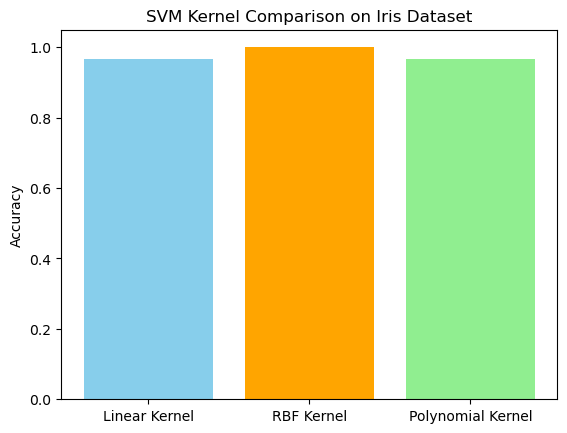

In [26]:
# Compare accuracies of different kernels
acc_results = {
    "Linear Kernel": accuracy_score(y_test, y_pred_linear),
    "RBF Kernel": accuracy_score(y_test, y_pred_rbf),
    "Polynomial Kernel": accuracy_score(y_test, y_pred_poly)
}

plt.bar(acc_results.keys(), acc_results.values(), color=["skyblue", "orange", "lightgreen"])
plt.ylabel("Accuracy")
plt.title("SVM Kernel Comparison on Iris Dataset")
plt.show()
